In [1]:

#Participants
#Japan Semiconductor ETF (2644 JP)
#Nomura Nikkei 225 ETF (1321 JP)

#Package
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# Read excel file
file_path = r'D:\Derivatives Trading\Japan Semi vs NK225.xlsx'
df = pd.read_excel(file_path, index_col='Date', parse_dates=True)

In [3]:
# Calculate daily returns
returns = df.pct_change()

# Remove any NaN values
returns = returns.dropna()


Descriptive Statistics:
       Japan Semiconductor ETF  Nomura Nikkei 225 ETF
count               784.000000             784.000000
mean                  0.000674               0.000428
std                   0.021508               0.012968
min                  -0.162198              -0.113900
25%                  -0.011771              -0.007032
50%                   0.000951               0.000882
75%                   0.013350               0.007665
max                   0.108800               0.074931

Correlation Matrix:
                         Japan Semiconductor ETF  Nomura Nikkei 225 ETF
Japan Semiconductor ETF                 1.000000               0.843384
Nomura Nikkei 225 ETF                   0.843384               1.000000

Annualized Volatility:
Japan Semiconductor ETF    0.341436
Nomura Nikkei 225 ETF      0.205865
dtype: float64


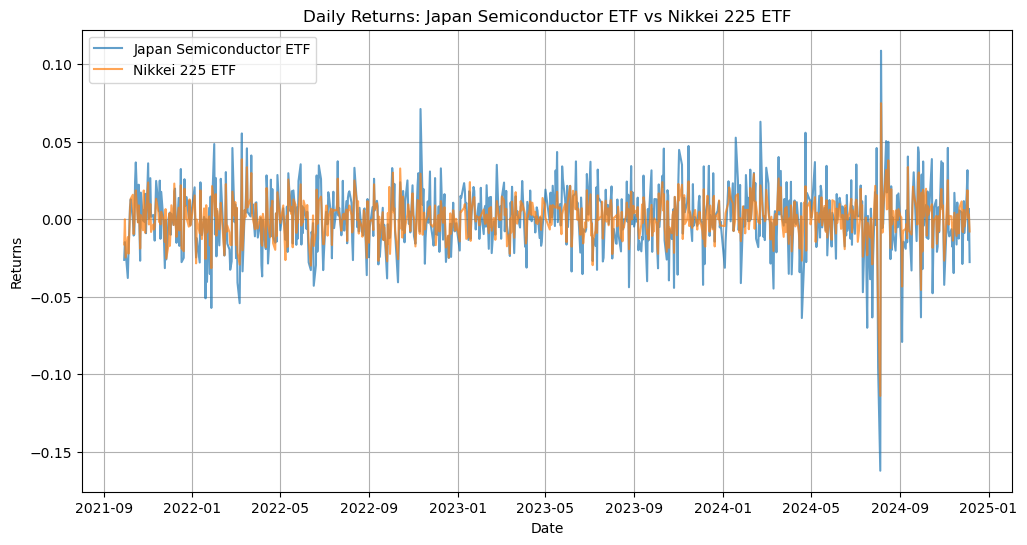

In [4]:
# Calculate descriptive statistics
desc_stats = returns.describe()
print("\nDescriptive Statistics:")
print(desc_stats)

# Calculate correlation
correlation = returns.corr()
print("\nCorrelation Matrix:")
print(correlation)

# Calculate annualized volatility (assuming 252 trading days)
annualized_vol = returns.std() * np.sqrt(252)
print("\nAnnualized Volatility:")
print(annualized_vol)

# Plot returns
plt.figure(figsize=(12, 6))
plt.plot(returns.index, returns['Japan Semiconductor ETF'], label='Japan Semiconductor ETF', alpha=0.7)
plt.plot(returns.index, returns['Nomura Nikkei 225 ETF'], label='Nikkei 225 ETF', alpha=0.7)
plt.title('Daily Returns: Japan Semiconductor ETF vs Nikkei 225 ETF')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

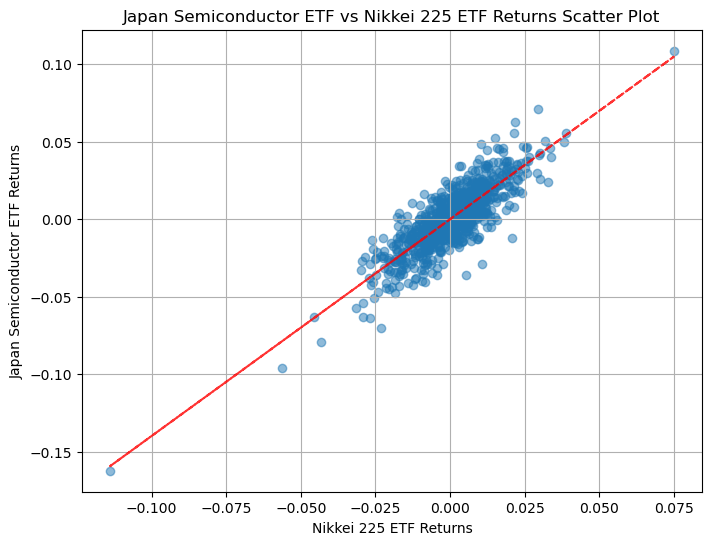


Regression Results:
                               OLS Regression Results                              
Dep. Variable:     Japan Semiconductor ETF   R-squared:                       0.711
Model:                                 OLS   Adj. R-squared:                  0.711
Method:                      Least Squares   F-statistic:                     1927.
Date:                     Sun, 08 Dec 2024   Prob (F-statistic):          3.68e-213
Time:                             20:47:49   Log-Likelihood:                 2385.1
No. Observations:                      784   AIC:                            -4766.
Df Residuals:                          782   BIC:                            -4757.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [5]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(returns['Nomura Nikkei 225 ETF'], returns['Japan Semiconductor ETF'], alpha=0.5)
plt.xlabel('Nikkei 225 ETF Returns')
plt.ylabel('Japan Semiconductor ETF Returns')
plt.title('Japan Semiconductor ETF vs Nikkei 225 ETF Returns Scatter Plot')
plt.grid(True)

# Add regression line
z = np.polyfit(returns['Nomura Nikkei 225 ETF'], returns['Japan Semiconductor ETF'], 1)
p = np.poly1d(z)
plt.plot(returns['Nomura Nikkei 225 ETF'], p(returns['Nomura Nikkei 225 ETF']), "r--", alpha=0.8)
plt.show()

# Calculate beta using regression
X = sm.add_constant(returns['Nomura Nikkei 225 ETF'])
model = sm.OLS(returns['Japan Semiconductor ETF'], X).fit()
print("\nRegression Results:")
print(model.summary())

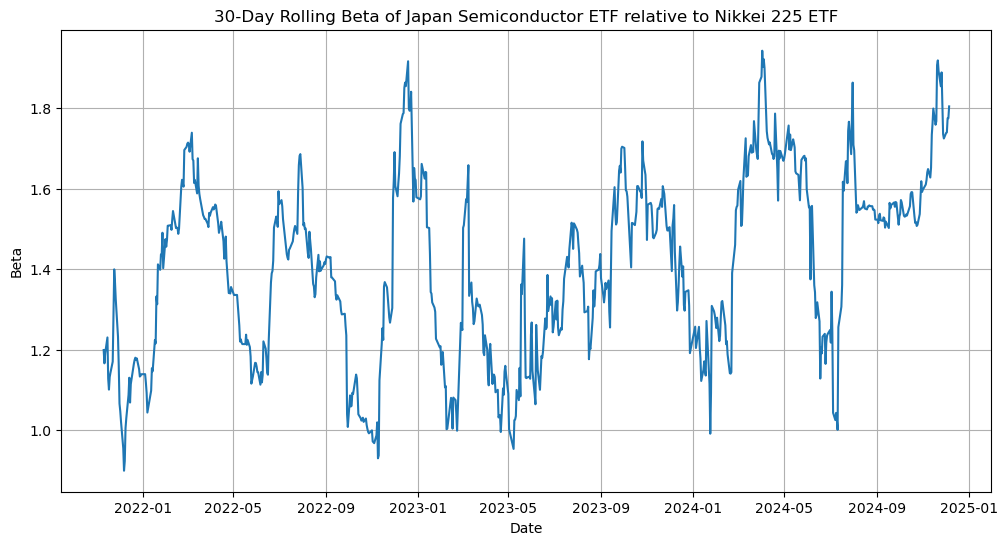

In [6]:
# Calculate rolling beta (30-day window)
def rolling_beta(x, y, window):
    ret = pd.DataFrame({'x': x, 'y': y})
    ret = ret.dropna()
    
    beta = pd.Series(index=ret.index)
    for i in range(window-1, len(ret)):
        slice_x = ret['x'].iloc[i-window+1:i+1]
        slice_y = ret['y'].iloc[i-window+1:i+1]
        beta.iloc[i] = np.cov(slice_x, slice_y)[0,1] / np.var(slice_x)
    
    return beta

rolling_beta_series = rolling_beta(returns['Nomura Nikkei 225 ETF'], returns['Japan Semiconductor ETF'], 30)

# Plot rolling beta
plt.figure(figsize=(12, 6))
plt.plot(rolling_beta_series.index, rolling_beta_series)
plt.title('30-Day Rolling Beta of Japan Semiconductor ETF relative to Nikkei 225 ETF')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.grid(True)
plt.show()

